In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot
include("zz_structures.jl")
include("mbsampler.jl")

get_clustering (generic function with 1 method)

In [2]:
d, Nobs = 20, 100
p = 1e-1
X = rand(Normal(), d, Nobs) .* rand(Binomial(1,p), d, Nobs)
X[1,:] = ones(Nobs)
ξ_true = rand(Normal(),d).* rand(Binomial(1,0.5), d)
ξ_true[1] = rand(Normal())
y = [rand(Binomial(1, 1/(1+exp(-ξ_true'X[:,j]))), 1)[1] + 0. for j in 1:Nobs];
mb_size = 10
σ02 = 1

1

In [3]:
prior = GDP_prior(d, σ02)

GDP_prior(20, 1.0, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 1.0, 1.0, 1.0, 1.0, 1.0)

In [4]:
my_ll = ll_logistic(X,y);
my_model = model(my_ll, prior)
root = find_root(my_model, rand(d));

In [5]:
# Sub-sampling with weights 
ϵ = 1e-2
weights = abs.(X) + ϵ
weights ./= sum(weights,2)
mb_size = 10;
gs = [wumbsampler(Nobs, mb_size, weights[i,:]) for i in 1:d]
gs_list = mbsampler_list(d,gs);

In [9]:
T_gibbs = 20_000
n_gibbs = 1_00  # number of bouncing attempts per Gibbs step

A = eye(d)
opf = projopf(A, 100) #initialise it
opt = maxa_opt(1)
outp = outputscheduler(opf,opt)
samples = gzz_samples(d,T_gibbs);

In [10]:
GZZ_sample(my_model, outp, gs_list, samples, T_gibbs, n_gibbs);

Progress: 100%|█████████████████████████████████████████| Time: 0:04:35


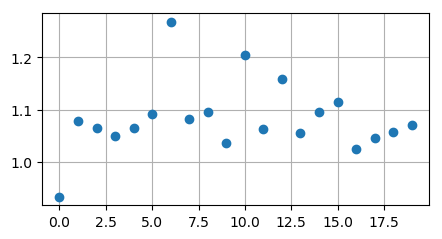

In [11]:
fig = figure("pyplot_barplot",figsize=(5,2.5))
plot([compute_configT(my_model, samples, k) for k in 1:d], "o")
grid(true)